In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
#import train dataset and test dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [19]:
#check head of train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#check head of test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
#check info for train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
#check info for test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [23]:
#check statistics of train ds
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dahlberg, Miss. Gerda Ulrika",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [24]:
#now check for missing values in train 
#train_df.columns[train_df.isnull().any()].tolist()
train_df.isnull().sum()
#As per observation 3 columns Age, Cabin and Embarked have null values which needs to 
#be handled.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
#missing values in test_df
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
#combine train and test dataset
train_len = len(train_df)
dataset =  pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

In [27]:
#average age of passengers survived
dataset['Age'].dropna()[dataset['Survived']==1].mean()

28.343689655172415

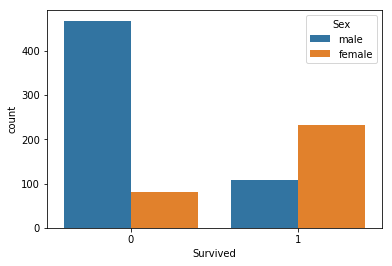

In [12]:
#gender wise analysis of survived passengers in train ds
#sns.barplot(x=train_df['Sex'],y=train_df[['Survived']].sum(axis=1))
sns.countplot(x='Survived',hue='Sex',data=train_df)


In [37]:
#By looking at column Cabin, it seems first letter denotes the cabin class. Let's create
#new feature Cabinclass by taking initial letter of column cabin
dataset['CabinClass']=dataset['Cabin'][dataset['Cabin'].notnull()].apply(lambda x : x[0])

In [38]:
#lets check counts of each Cabinclass
dataset['CabinClass'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: CabinClass, dtype: int64

In [40]:
#Since ,lot of values are missing ,we might consider to drop it.But keeping it as it indicates 
#the probable location of the passenger in the Titanic.Let's fill missing values with X.
dataset['CabinClass'][dataset['CabinClass'].isnull()] = 'X'


c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


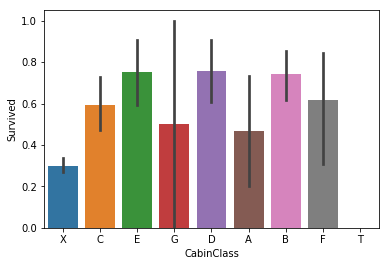

In [41]:
#lets check survival probability for each cabin class
sns.barplot(x='CabinClass',y='Survived',data=dataset[dataset['CabinClass'].notnull()])


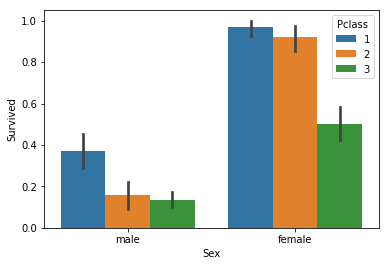

In [13]:
#Survival analysis as per Passenger class
#sns.countplot(x='Survived',hue='Pclass',data=train_df)
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=train_df)
#Observation - more people were survived from class 1 as compared to lower class. 
#Also, survival rate of women was high as compared to men(considering women were given preference)

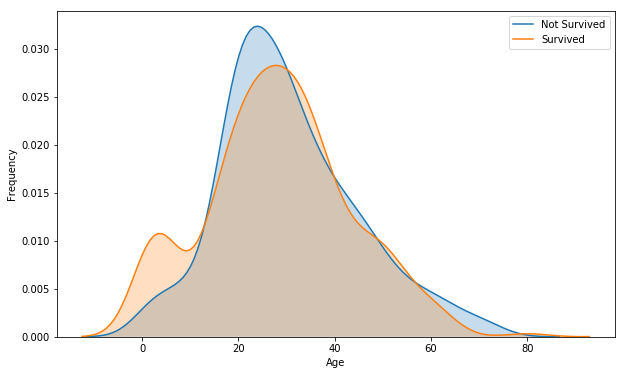

In [14]:
#Survival analysis as per Age
sns.set_context({"figure.figsize": (10, 6)})
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==0) & (train_df['Age'].notnull())],shade=True)
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==1) & (train_df['Age'] .notnull())]
                ,ax=g,shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
#from below plot, it seems that Young people(age 20-40) have more chances of survival.As 
#age increases, survival frequence decrease.People in age range 60-80 are less likely to survive.

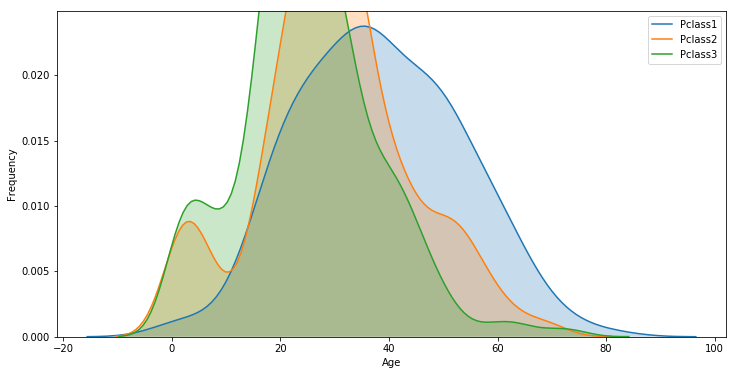

In [15]:
#Lets explore more with Age
sns.set_context({"figure.figsize": (12, 6)})
g = sns.kdeplot(train_df['Age'][(train_df['Pclass']==1) & (train_df['Age'].notnull())],shade=True)
g = sns.kdeplot(train_df['Age'][(train_df['Pclass']==2) & (train_df['Age'] .notnull())]
                ,ax=g,shade=True)
g = sns.kdeplot(train_df['Age'][(train_df['Pclass']==3) & (train_df['Age'] .notnull())]
                ,ax=g,shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Pclass1","Pclass2","Pclass3"])

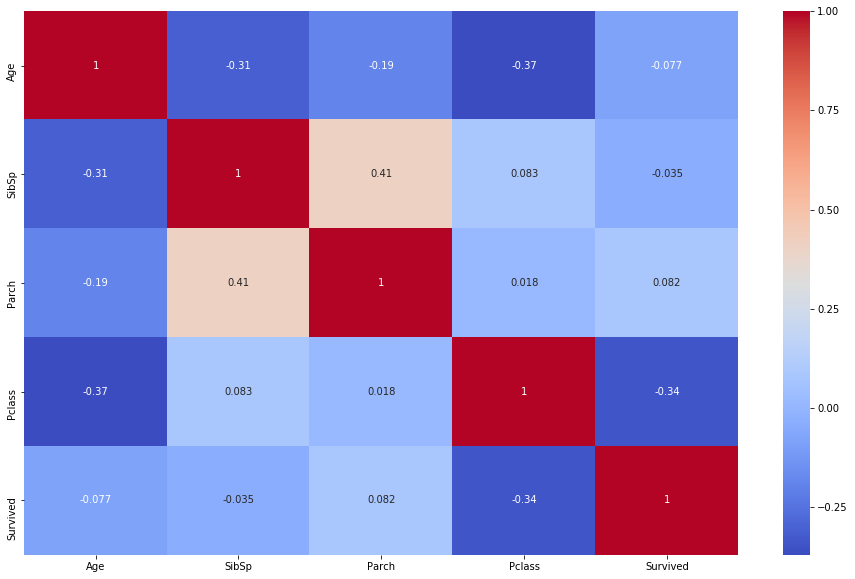

In [45]:
#lets see correlation in training data
fig,ax = plt.subplots(figsize=(16,10))
sns.heatmap(data=dataset[:train_len][["Age","Sex","SibSp","Parch","Pclass","Survived",
                                      "CabinClass"]].corr(),cmap='coolwarm',annot=True,ax=ax)


In [46]:
#Drop unnecessary columns - name,ticket & cabin as they certainly dont have any impact on predictions.
# train_df = train_df.drop(['Ticket','Cabin'],axis=1)
# test_df = test_df.drop(['Ticket','Cabin'],axis=1)
dataset = dataset.drop(['Ticket','Cabin'],axis=1)

In [47]:
#Handle missing values now. Let's start with lowest number - Embarked
#Let's first check unique values of Embarked and their occurences
dataset['Embarked'].value_counts()
#From results we can see 'S' is the most occurred value for column Embarked.

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [48]:
#Let's fill missing values with 'S' in Embarked
# train_df['Embarked'] = train_df['Embarked'].fillna("S")
# test_df['Embarked'] = test_df['Embarked'].fillna("S")
dataset['Embarked'] = dataset['Embarked'].fillna("S")

In [49]:
#Now we need to fill missing values in Age column. Let's first check the Survived columns for missing ages.
#train_df['Survived'][train_df['Age'].isnull()].value_counts()
dataset['Survived'][dataset['Age'].isnull()].value_counts()

0.0    125
1.0     52
Name: Survived, dtype: int64

In [50]:
# print(train_df['Age'].dropna().mean())
# print(test_df['Age'].dropna().mean())
print(dataset['Age'].dropna().mean())

29.881137667304014


In [51]:
#Lets fill missing Age with mean value of Age for Survived(1) and Not Survived(0)
# mean_age_notsurvived = train_df['Age'][train_df['Survived']==0].dropna().mean()
# mean_age_survived = train_df['Age'][train_df['Survived']==1].dropna().mean()
# train_df['Age'][(train_df['Age'].isnull()) & (train_df['Survived']==0)] =  mean_age_notsurvived
# train_df['Age'][(train_df['Age'].isnull()) & (train_df['Survived']==1)] =  mean_age_survived

In [52]:
#lets do the same with test dataset
# mean_age = test_df['Age'].dropna().mean()
# test_df['Age'][test_df['Age'].isnull()] =  mean_age


In [53]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

c:\users\pareshbhatia\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
#Exploration - 30.272590361445815
dataset['Age'].mean()

29.179656226126813

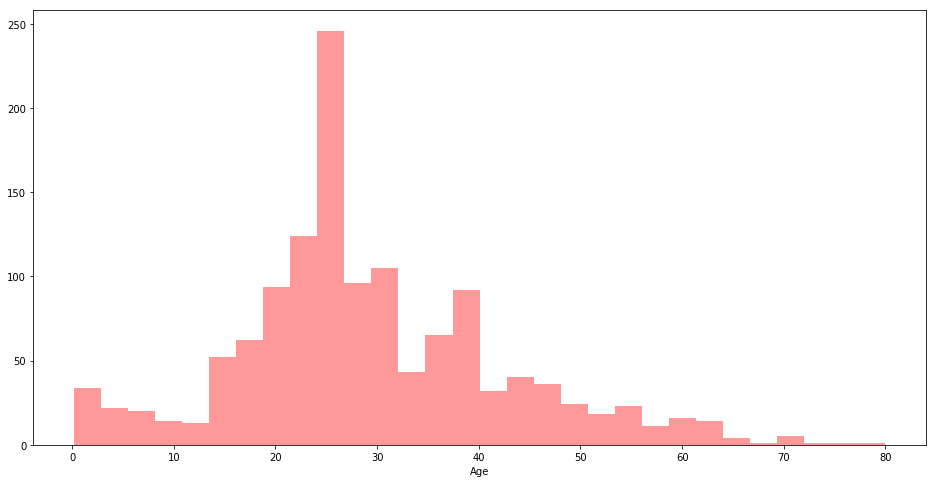

In [55]:
fig,ax = plt.subplots(figsize=(16,8))
#sns.countplot(x = 'Age',data=train_df,ax=ax)
#sns.distplot(train_df['Age'],kde=False,color='Red')
sns.distplot(dataset['Age'],kde=False,color='Red')

In [56]:
#create new feature title from Name
# train_df['Title'] = train_df['Name'].apply(lambda x :x.split(",")[1].split(".")[0].strip())
# test_df['Title'] =test_df['Name'].apply(lambda x :x.split(",")[1].split(".")[0].strip())
dataset['Title'] = dataset['Name'].apply(lambda x :x.split(",")[1].split(".")[0].strip())


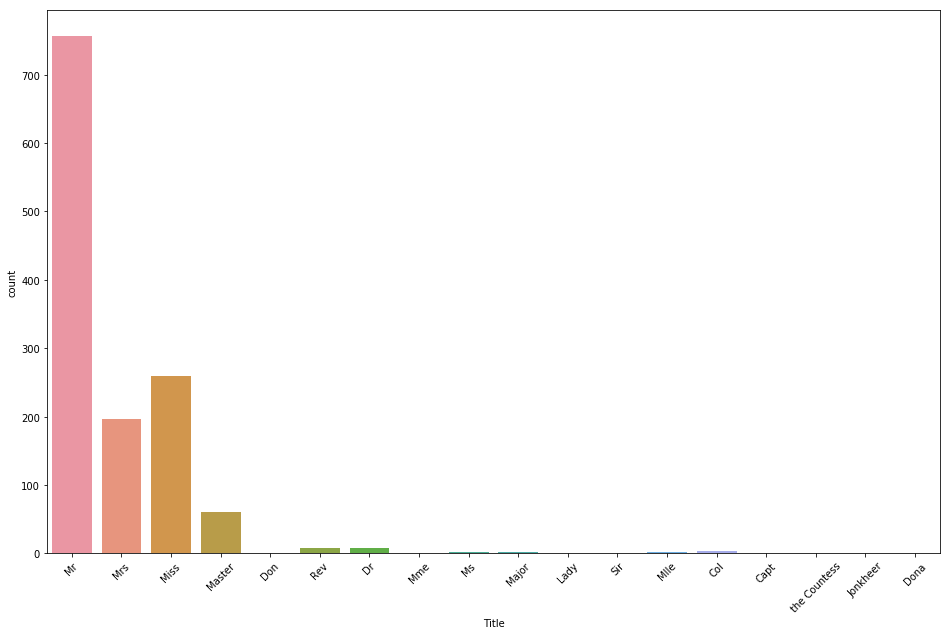

In [57]:
#check counts as per title
fig,ax = plt.subplots(figsize=(16,10))
plt.setp(ax.get_xticklabels(), rotation=45)
sns.countplot(x='Title',data=dataset,ax=ax)


In [58]:
#From the above countplot we can see that all title except Mr.,Mrs.,Miss. have very low count in population

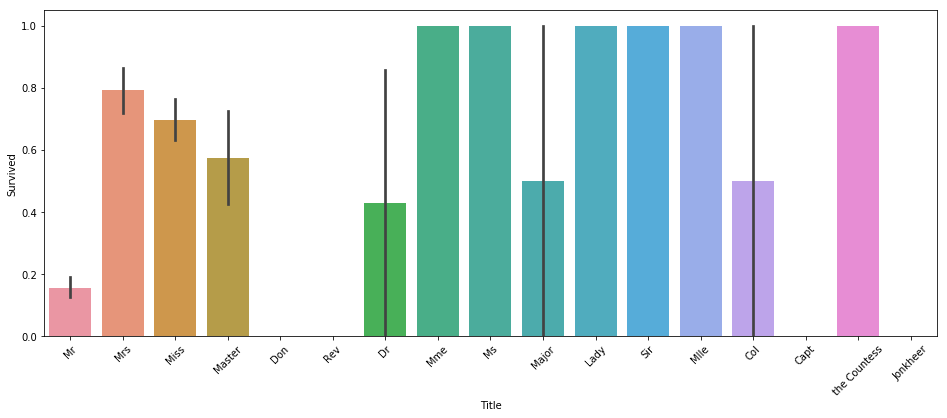

In [59]:
#check for relation between survival and title
fig, ax = plt.subplots(figsize=(16,6))
plt.setp(ax.get_xticklabels(), rotation=45)
sns.barplot(x='Title',y='Survived',data=dataset[:train_len],ax=ax)

In [60]:
#From above two plots, it is evident that rare title(very less in population) have high survival rate.
#Lets' convert title into a categorical feature
# train_df['Title'] = train_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 
#                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# train_df['Title'] = train_df['Title'].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, 
#                                         "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
# test_df['Title'] = test_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 
#                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# test_df['Title'] = test_df['Title'].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, 
#                                       "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, 
                                        "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})


In [61]:
#Create binary mapping 
# train_df['Title'] = train_df['Title'].map({'Rare':1,'Misc':0})
# test_df['Title'] = test_df['Title'].map({'Rare':1,'Misc':0})
# #train_df['Title'] = train_df['Title'].astype(int)
#test_df['Title'] = test_df['Title'].astype(int)


In [62]:
dataset['Name'][dataset['Title'].isnull()]


Series([], Name: Name, dtype: object)

In [63]:
#convert Age to catoegorical
# train_df.loc[ train_df['Age'] <= 16, 'Age']      = 0
# train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
# train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
# train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
# train_df.loc[ train_df['Age'] > 64, 'Age']                           = 4
#do the same for test dataset
# test_df.loc[ test_df['Age'] <= 16, 'Age']      = 0
# test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
# test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
# test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
# test_df.loc[ test_df['Age'] > 64, 'Age']                           = 4

dataset.loc[ dataset['Age'] <= 16, 'Age']      = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4




In [64]:
mean_fare = dataset['Fare'].dropna().mean()
dataset['Fare'][dataset['Fare'].isnull()] = mean_fare

c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
#convert categorical column Sex to numerical values.
# train_df['Sex'] = train_df['Sex'].map({'female': 1,'male':0})
# test_df['Sex'] = test_df['Sex'].map({'female': 1,'male':0})
dataset['Sex'] = dataset['Sex'].map({'female': 1,'male':0})




In [66]:
#Lets convert the categorical feature Embarked to numerical
# train_df['Embarked'] = train_df['Embarked'].map({'S':0,'Q':1,'C':2})
# test_df['Embarked'] = test_df['Embarked'].map({'S':0,'Q':1,'C':2})
dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2})


In [67]:
#Create new Feature HasFamily based on Parch,SibSp
# train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp']
# train_df['HasFamily'] = train_df['FamilySize'].map(lambda x : 1 if x > 0 else 0 )
# test_df['FamilySize'] = test_df['Parch'] + test_df['SibSp']
# test_df['HasFamily'] = test_df['FamilySize'].map(lambda x : 1 if x > 0 else 0 )

dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp']
dataset['HasFamily'] = dataset['FamilySize'].map(lambda x : 1 if x > 0 else 0 )



In [68]:
#Some more feature engineering
# train_df = pd.get_dummies(train_df,columns=['Title','Pclass','Age','Embarked'],prefix=['Title','Pc','Age','Embd'])
# test_df = pd.get_dummies(test_df,columns=['Title','Pclass','Age','Embarked'],prefix=['Title','Pc','Age','Embd'])
# train_df = pd.get_dummies(train_df,columns=['Pclass','Age'],prefix=['Pc','Age'])
# test_df = pd.get_dummies(test_df,columns=['Pclass','Age'],prefix=['Pc','Age'])

dataset = pd.get_dummies(dataset,columns=['Title','Pclass','Age','Embarked','CabinClass']
                         ,prefix=['Title','Pc','Age','Embd','Cabin'])
#train_df.head()

In [69]:
#Lets drop some unnecessary features 
# train_df.drop(['PassengerId','Name','Parch','SibSp','FamilySize','Fare'],axis=1,inplace=True)
# test_df.drop(['Parch','Name','SibSp','FamilySize','Fare'],axis=1,inplace=True)
dataset.drop(['Parch','Name','SibSp','FamilySize','Fare'],axis=1,inplace=True)


In [111]:
#Lets start with importing models
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict

In [112]:
## Separate train dataset and test dataset

train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [113]:
#do train test split

y = train['Survived']
X = train.drop(['Survived','PassengerId'],axis=1)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=101)
kfold = StratifiedKFold(n_splits=10,random_state=0)

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
PassengerId    1309 non-null int64
Sex            1309 non-null int64
Survived       891 non-null float64
HasFamily      1309 non-null int64
Title_0        1309 non-null uint8
Title_1        1309 non-null uint8
Title_2        1309 non-null uint8
Title_3        1309 non-null uint8
Pc_1           1309 non-null uint8
Pc_2           1309 non-null uint8
Pc_3           1309 non-null uint8
Age_0.0        1309 non-null uint8
Age_1.0        1309 non-null uint8
Age_2.0        1309 non-null uint8
Age_3.0        1309 non-null uint8
Age_4.0        1309 non-null uint8
Embd_0         1309 non-null uint8
Embd_1         1309 non-null uint8
Embd_2         1309 non-null uint8
Cabin_A        1309 non-null uint8
Cabin_B        1309 non-null uint8
Cabin_C        1309 non-null uint8
Cabin_D        1309 non-null uint8
Cabin_E        1309 non-null uint8
Cabin_F        1309 non-null uint8
Cabin_G        13

In [115]:
#Logistic regression
lr = LogisticRegression(random_state=0)

#lr_pred = lr.predict(X_test)
# lr_score = lr.score(X,y)
# print('accuracy :',lr_score)
#accuracy with train_test_split - 0.80597014925373134
lr_score = cross_val_score(lr,X,y,cv=kfold)
#lr_pred = lr.predict(X_test)
#lr_pred = cross_val_predict(lr,X,y,cv=10)
print('accuracy :',lr_score.mean())
lr.fit(X,y)
#accuracy with 5 fold cross validation - 0.805774500768
# test['Survived'] = lr.predict(test.drop('PassengerId',axis=1)).astype(int)
# output = test[['PassengerId','Survived']]
# output.to_csv('output.csv',index=False)


accuracy : 0.820470434684


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# knn.fit(X_train,y_train)
# knn_score = knn.score(X_test,y_test)
# print('accuracy :',knn_score)
#accuracy with train_test_split - 0.66044776119402981
knn_score = cross_val_score(knn,X,y,cv=kfold) 
print('accuracy :',knn_score.mean())
#knn_pred = cross_val_predict(knn,X,y,cv=10)


accuracy : 0.822693224379


In [117]:
#Support vector machine
svc = SVC()
# svc.fit(X,y)
# svc_pred = svc.predict(X_test)
# svc_score = svc.score(X,y)
# print('accuracy :',svc_score)
svc_score = cross_val_score(svc,X,y,cv=kfold)
print('accuracy :',svc_score.mean())
# svc_pred = cross_val_predict(svc,X,y,cv=10)
#accuracy with train_test_split - 0.59328358208955223

accuracy : 0.786723413914


In [118]:
#Decision Tree
dt = DecisionTreeClassifier()
#dt.fit(X,y)
# dt_pred = dt.predict(X_test)
# dt_score = dt.score(X,y)
# print('accuracy :',dt_score)
#accuracy with train_test_split - 0.77985074626865669
dt_score = cross_val_score(dt,X,y,cv=kfold)
print('accuracy :',dt_score.mean())
# dt_pred  = cross_val_predict(dt,X,y,cv=10)


accuracy : 0.809208375894


In [119]:
#Random Forest
rf = RandomForestClassifier(n_estimators=600,random_state=0)
#rf.fit(X,y)
# rf_pred = rf.predict(X_test)
# rf_score = rf.score(X,y)
# print('accuracy :',rf_score)
#accuracy with train_test_split - 0.82835820895522383
rf_score = cross_val_score(rf,X,y,cv=kfold)
print('accuracy :',rf_score.mean())
rf.fit(X,y)
test['Survived'] = rf.predict(test.drop('PassengerId',axis=1)).astype(int)
output = test[['PassengerId','Survived']]
output.to_csv('output.csv',index=False)


accuracy : 0.812617183067


c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [102]:
#Gradient boosting classifier
gdb = GradientBoostingClassifier()
gdb_score = cross_val_score(gdb,X,y,cv=kfold)
print('accuracy :',gdb_score.mean())
gdb.fit(X,y)
# test['Survived'] = gdb.predict(test.drop('PassengerId',axis=1)).astype(int)
# output = test[['PassengerId','Survived']]
# output.to_csv('output.csv',index=False)


accuracy : 0.823815684939


c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
#Adaboost classifer
adb = AdaBoostClassifier(n_estimators=200)
adb_score = cross_val_score(adb,X,y,cv=kfold)
print('accuracy :',adb_score.mean())

accuracy : 0.80928413347
